In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import math
import pandas as pd

## Cargamos los datos

In [6]:
location = 'rioTimes.csv'
df = pd.read_csv(location)

def extract_samples_from(name):
    return df[df["name"].str.contains(name)]["time"].values

In [7]:
KatieTimes=extract_samples_from("LEDECKY")

In [8]:
KatieTimes

array([ 28.39,  30.42,  30.2 ,  30.94,  30.87,  31.28,  30.92,  31.32,
        31.21,  31.56,  31.28,  31.63,  31.36,  31.43,  31.32,  30.5 ])

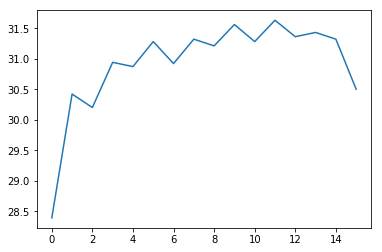

In [10]:
plt.plot(KatieTimes)

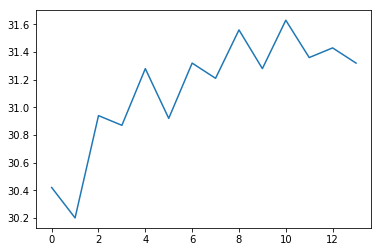

In [11]:
KatieTimes2=KatieTimes[1:-1]
plt.plot(KatieTimes2) #quitamos el primer y último tiempo de la nadadora

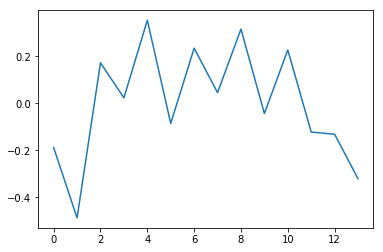

In [12]:
#quitamos la tendencia por el cansancio ya que cada vez los tiempos son más altos
from scipy import signal
KatieTimes3=signal.detrend(KatieTimes2)
plt.plot(KatieTimes3)


In [13]:
KatieIda=np.array([value for key, value in enumerate(KatieTimes3) if key%2==0])
KatieIda

array([-0.188     ,  0.17314286,  0.35428571,  0.23542857,  0.31657143,
        0.22771429, -0.13114286])

In [14]:
KatieVuelta=np.array([value for key, value in enumerate(KatieTimes3) if key%2==1])
KatieVuelta

array([-0.48742857,  0.02371429, -0.08514286,  0.046     , -0.04285714,
       -0.12171429, -0.32057143])

In [18]:
#stats.kurtosistest(KatieIda)
#stats.skewtest(KatieIda)
#stats.normaltest(KatieIda)
stats.shapiro(KatieIda) 

(0.8427388668060303, 0.10535799711942673)

In [19]:
stats.shapiro(KatieVuelta) 

(0.8816441297531128, 0.23384658992290497)

In [20]:
stats.ttest_rel(KatieIda,KatieVuelta)

Ttest_relResult(statistic=6.8976879536855016, pvalue=0.00045865009139433877)